In [1]:
import numpy as np
import pandas as pd
from numpy.random import rand
import matplotlib.pyplot as plt
import itertools

In [2]:
import keras
from keras import regularizers
from keras.models import Model, Sequential
from keras.optimizers import Adam
from keras.layers import Activation,Dense, Dropout, Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D 
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [3]:
train="Train/"
test="Test/"
train_data = ImageDataGenerator().flow_from_directory(directory=train, target_size=(256, 256), classes = ['Human', 'Not Human'], color_mode='rgb', class_mode='binary', batch_size=10, interpolation='nearest')
test_data = ImageDataGenerator().flow_from_directory(directory=test, target_size=(256, 256), color_mode='rgb', class_mode='binary', batch_size=6, interpolation='nearest')

Found 360 images belonging to 2 classes.
Found 24 images belonging to 2 classes.


In [4]:
model = keras.applications.vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(256,256,3))

In [6]:
out = model.output
out = GlobalAveragePooling2D()(out)
out = Dense(512, activation='relu')(out)
out = Dense(512, activation='relu')(out)
total_classes = 2
predictions = Dense(total_classes, activation='softmax')(out)
mymodel = Model(inputs=model.input, outputs=predictions)

In [7]:
mymodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0         
__________

In [8]:
for layer in model.layers:
    layer.trainable = False #freeze model

In [9]:
mymodel.compile(Adam(lr=.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
mymodel.fit_generator(train_data,
                  steps_per_epoch=10,
                  epochs=5,
                  verbose=1)

Epoch 1/5
10/10 [==============================] - 9s 947ms/step - loss: 0.6220 - acc: 0.8500
Epoch 2/5
10/10 [==============================] - 6s 566ms/step - loss: 0.0926 - acc: 0.9600
Epoch 3/5
10/10 [==============================] - 6s 567ms/step - loss: 0.0502 - acc: 0.9700
Epoch 4/5
10/10 [==============================] - 6s 568ms/step - loss: 0.0574 - acc: 0.9600
Epoch 5/5
10/10 [==============================] - 6s 570ms/step - loss: 0.0038 - acc: 1.0000


In [11]:
 # plots images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

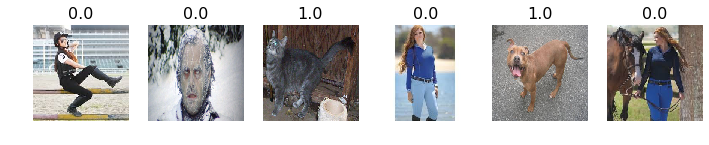

In [12]:
test_img, test_labels = next(test_data)
plots(test_img, titles=test_labels)

In [13]:
acc = mymodel.evaluate_generator(test_data, 10)
print(f'The accuracy is {round(acc[1]*100,2)}%')

The accuracy is 86.67%
